# Exploración de datos complementaria

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datos/DATA_HLF_MDS_2.csv', sep=',')  # .sample(n=10000, random_state=0)

In [2]:
def resumen_columna(dataframe,columna):
    largo = len(dataframe[columna])
    print("Largo de columna = {}".format(largo))
    print('Cantidad de valores nulos en columna {}: {}'.format(columna,dataframe.isna().sum()[columna]))
    dup = dataframe[columna].dropna().duplicated().sum()
    print('Total de {} filas duplicadas ({}%)'.format(dup,"{:.1f}".format(100*dup/largo)))
    sin = len(dataframe[columna].value_counts())
    print('Cantidad de valores únicos : {} ({}%)'.format(sin,"{:.1f}".format(100*sin/largo)))

## RESUMEN

In [3]:
resumen_columna(df,'RESUMEN')

Largo de columna = 1526557
Cantidad de valores nulos en columna RESUMEN: 1
Total de 1473779 filas duplicadas (96.5%)
Cantidad de valores únicos : 52777 (3.5%)


In [4]:
df = df[df['RESUMEN'].notna()]

**Tabla de tokens más frecuentes**

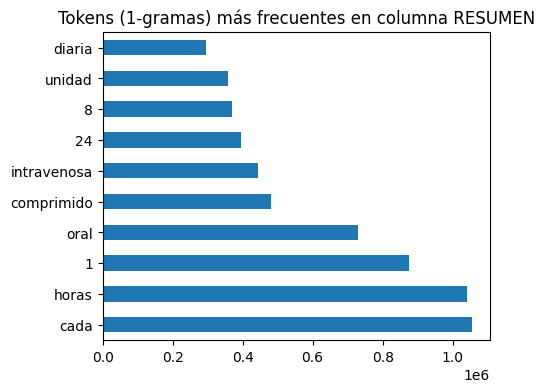

In [5]:
mas_comunes =  pd.Series(' '.join(df['RESUMEN']).lower().split()).value_counts()
mas_comunes[:10].plot.barh(figsize=(5, 4),title='Tokens (1-gramas) más frecuentes en columna RESUMEN');

In [6]:
from collections import Counter
from nltk import ngrams

def common_ngrams(df,n,columna):
    ngram_counts = Counter(ngrams(' '.join(df[columna]).lower().split(), n))
    comunes_2g = ngram_counts.most_common(10)
    series_2g = pd.Series([tup[1] for tup in comunes_2g],index=[' '.join(tup[0]) for tup in comunes_2g])
    series_2g.plot.barh(figsize=(5, 5),title='{}-gramas más frecuentes en columna {}'.format(n,columna));

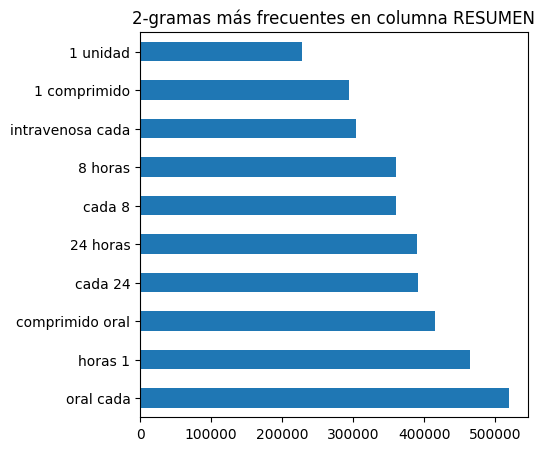

In [7]:
common_ngrams(df,2,'RESUMEN')

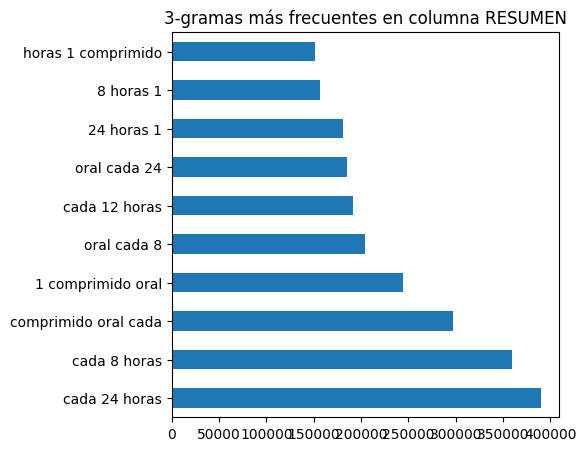

In [8]:
common_ngrams(df,3,'RESUMEN')

## IND_ADMINISTRACION 1 y 2

In [9]:
resumen_columna(df,'IND_ADMINISTRACION_2')

Largo de columna = 1526556
Cantidad de valores nulos en columna IND_ADMINISTRACION_2: 1162878
Total de 188375 filas duplicadas (12.3%)
Cantidad de valores únicos : 175303 (11.5%)


In [10]:
resumen_columna(df,'IND_ADMINISTRACION_1')

Largo de columna = 1526556
Cantidad de valores nulos en columna IND_ADMINISTRACION_1: 1495031
Total de 23208 filas duplicadas (1.5%)
Cantidad de valores únicos : 8317 (0.5%)


In [11]:
df = df[df['IND_ADMINISTRACION_2'].notna()]

In [12]:
ej = df.sample(random_state=0)
print(ej['IND_ADMINISTRACION_2'])
print(ej['RESUMEN'])

1512843    SOS en caso de parestesias o calambres adminis...
Name: IND_ADMINISTRACION_2, dtype: object
1512843    1 UNIDAD INTRAVENOSA diaria durante 3 dias 
Name: RESUMEN, dtype: object


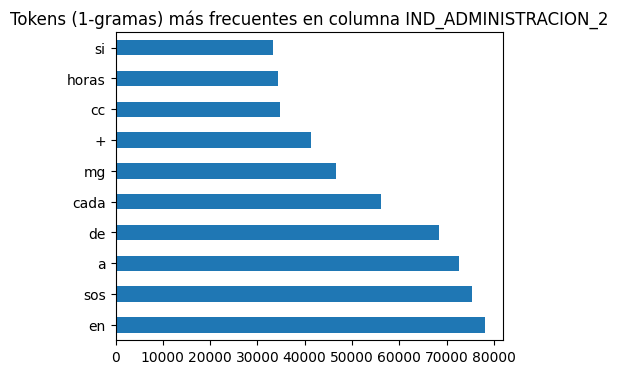

In [13]:
mas_comunes =  pd.Series(' '.join(df['IND_ADMINISTRACION_2']).lower().split()).value_counts()
mas_comunes[:10].plot.barh(figsize=(5, 4),title='Tokens (1-gramas) más frecuentes en columna IND_ADMINISTRACION_2');

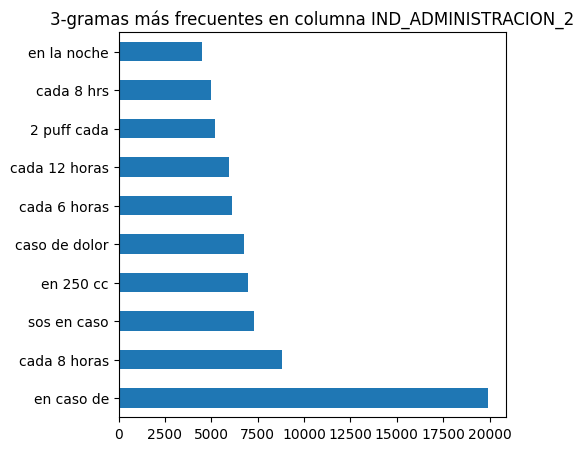

In [14]:
common_ngrams(df,3,'IND_ADMINISTRACION_2')

In [15]:
resumen_columna(df,'IND_ADMINISTRACION_1')

Largo de columna = 363678
Cantidad de valores nulos en columna IND_ADMINISTRACION_1: 361967
Total de 1019 filas duplicadas (0.3%)
Cantidad de valores únicos : 692 (0.2%)


In [16]:
df = df[df['IND_ADMINISTRACION_1'].notna()]

In [17]:
ej = df.sample(random_state=0)
print(ej['IND_ADMINISTRACION_1'])
print(ej['RESUMEN'])

856258    Pauta variable
Name: IND_ADMINISTRACION_1, dtype: object
856258    0,5 COMPRIMIDO ORAL cada 24 horas durante 20 d...
Name: RESUMEN, dtype: object


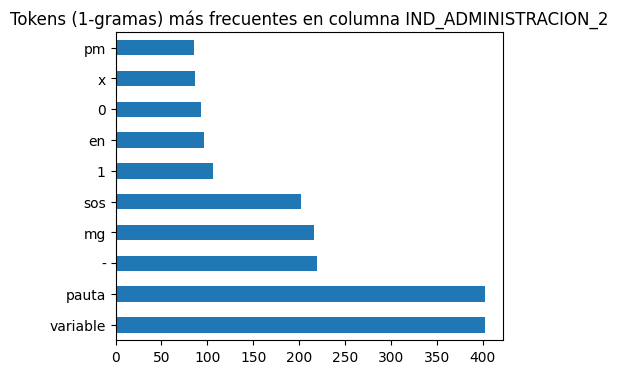

In [18]:
mas_comunes =  pd.Series(' '.join(df['IND_ADMINISTRACION_1']).lower().split()).value_counts()
mas_comunes[:10].plot.barh(figsize=(5, 4),title='Tokens (1-gramas) más frecuentes en columna IND_ADMINISTRACION_2');

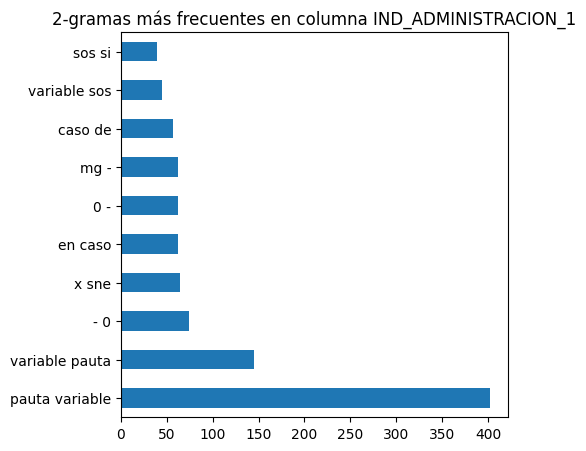

In [19]:
common_ngrams(df,2,'IND_ADMINISTRACION_1')

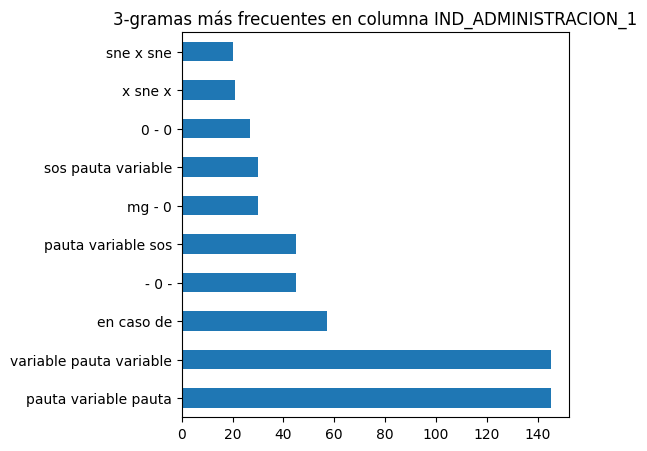

In [20]:
common_ngrams(df,3,'IND_ADMINISTRACION_1')